In [18]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./epa-sea-level.csv')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [52]:
years_from_1880_to_2050 = np.arange(1880, 2051)
years_from_2000_to_2050 = years_from_1880_to_2050[years_from_1880_to_2050 >= 2000]

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df.loc[df['Year'] >= 2000, 'Year'], df.loc[df['Year'] >= 2000, 'NOAA Adjusted Sea Level'])

line1 = slope1 * years_from_1880_to_2050 + intercept1
line2 = slope2 * years_from_2000_to_2050 + intercept2

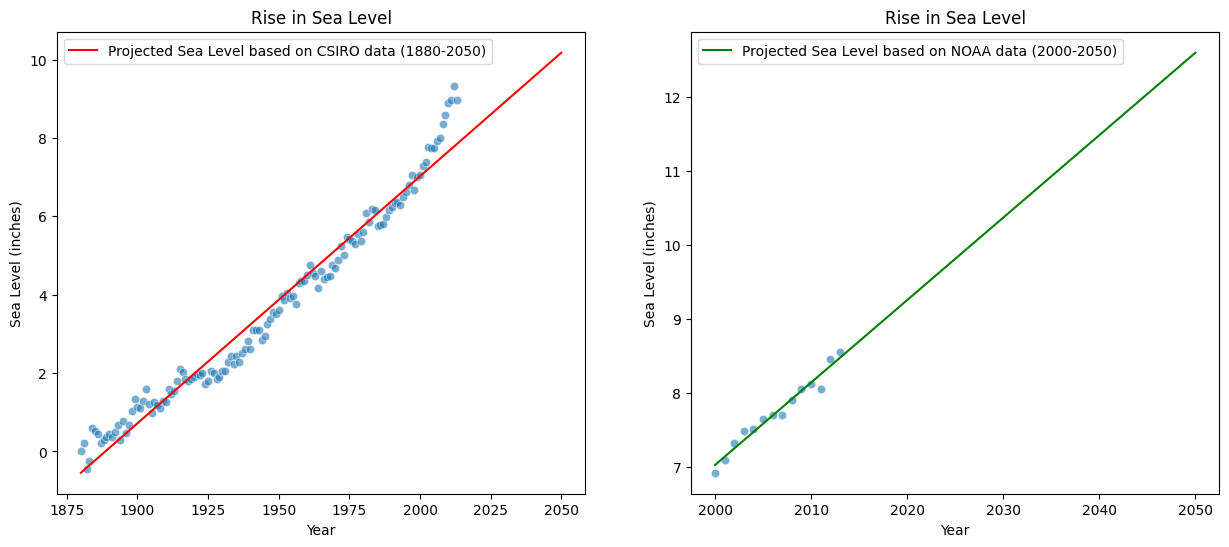

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha=0.6, edgecolors='w', linewidth=0.5)
ax2.scatter(df.loc[df['Year'] >= 2000, 'Year'], df.loc[df['Year'] >= 2000, 'NOAA Adjusted Sea Level'], alpha=0.6, edgecolors='w', linewidth=0.5)
ax1.plot(years_from_1880_to_2050, line1, color='red', label='Projected Sea Level based on CSIRO data (1880-2050)')
ax2.plot(years_from_2000_to_2050, line2, color='green', label='Projected Sea Level based on NOAA data (2000-2050)')

ax1.set_title('Rise in Sea Level')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sea Level (inches)')

ax2.set_title('Rise in Sea Level')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sea Level (inches)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.savefig('sea_level_plot.png')

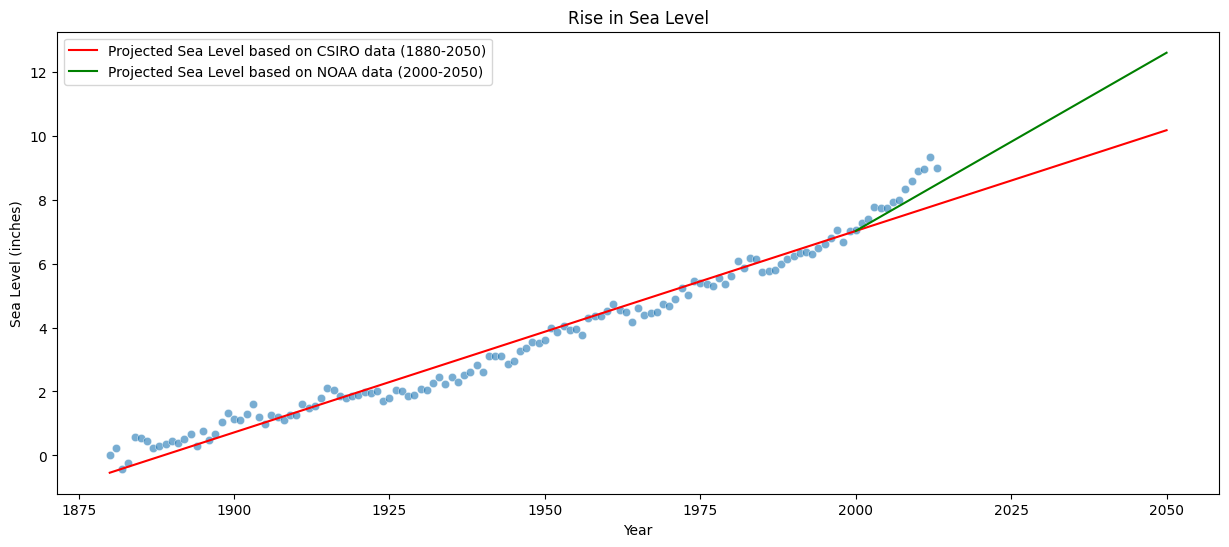

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha=0.6, edgecolors='w', linewidth=0.5)
ax.plot(years_from_1880_to_2050, line1, color='red', label='Projected Sea Level based on CSIRO data (1880-2050)')
ax.plot(years_from_2000_to_2050, line2, color='green', label='Projected Sea Level based on NOAA data (2000-2050)')

ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')

plt.legend()

plt.savefig('sea_level_plot.png')